<a href="https://colab.research.google.com/github/Ishank2301/Comprehensive-ML-Handbook/blob/main/Template_Kaggle_df_Usage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries:

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

# Generate Data:

### 1. Install the Kaggle library

In [ ]:
pip install kaggle

### 2. Configure your Kaggle API key

Download your `kaggle.json` file from your Kaggle account (Profile -> Account -> Create New API Token).

Then, upload this file to your Colab environment in the directory `~/.kaggle/` and set the correct permissions.

In [ ]:
import os
from google.colab import files


# Upload kaggle.json
files.upload()


print("Kaggle API key configured successfully!")

Saving kaggle.json to kaggle.json
Kaggle API key configured successfully!


In [ ]:
# Create .kaggle directory if it doesn't exist
!mkdir -p ~/.kaggle
# Move the uploaded kaggle.json to the correct directory
!mv kaggle.json ~/.kaggle/

# Set permissions
!chmod 600 ~/.kaggle/kaggle.json


### 3. Import `kagglehub` and download the dataset



In [ ]:
import kagglehub

# Download the latest version of the dataset
# Replace 'sumanthvrao/daily-climate-time-series-data' with your desired dataset path
path = kagglehub.dataset_download("")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'daily-climate-time-series-data' dataset.
Path to dataset files: /kaggle/input/daily-climate-time-series-data


In [ ]:
import kagglehub
!kaggle datasets download -d sumanthvrao/daily-climate-time-series-data
!unzip daily-climate-time-series-data.zip

Dataset URL: https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data
License(s): CC0-1.0
daily-climate-time-series-data.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  daily-climate-time-series-data.zip
  inflating: DailyDelhiClimateTest.csv  
  inflating: DailyDelhiClimateTrain.csv  


# Create our Model:

In [ ]:
Model = Sequential()
Model.add(Dense(128,input_dim=2,activation="relu",kernel_regularizer=tf.keras.regularizers.L2(0.03)))
Model.add(Dropout(0.25))
Model.add(Dense(128,input_dim=2,activation="relu",kernel_regularizer=tf.keras.regularizers.L2(0.03)))
Model.add(Dropout(0.25))
Model.add(Dense(1,activation="sigmoid"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
adam = Adam(learning_rate=0.01)

In [ ]:
Model.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_56 (Dense)                │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
Model.compile(loss="binary_crossentropy",optimizer=adam,metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
ES = EarlyStopping(monitor="val_loss",
                   min_delta=0.00001,
                   patience=50,
                   verbose=1,
                   mode="auto",
                   baseline=None,
                   restore_best_weights=True,
                   )

In [ ]:
history = Model.fit(X, y, epochs=1500, validation_split = 0.2,verbose=1,callbacks=ES)

Epoch 1/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step - accuracy: 0.5516 - loss: 4.2781 - val_accuracy: 0.8500 - val_loss: 2.7296
Epoch 2/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7906 - loss: 2.5132 - val_accuracy: 0.9000 - val_loss: 1.5450
Epoch 3/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8148 - loss: 1.4469 - val_accuracy: 0.9000 - val_loss: 0.8903
Epoch 4/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8102 - loss: 0.9023 - val_accuracy: 0.9000 - val_loss: 0.6049
Epoch 5/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8164 - loss: 0.6940 - val_accuracy: 0.9000 - val_loss: 0.5875
Epoch 6/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7867 - loss: 0.6597 - val_accuracy: 0.9000 - val_loss: 0.5783
Epoch 7/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7914 - loss: 0.6949 - val_accuracy: 0.9000 - val_loss: 0.5393
Epoch 8/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7953 - loss: 0.6966 - val_accuracy: 0.9000 - 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


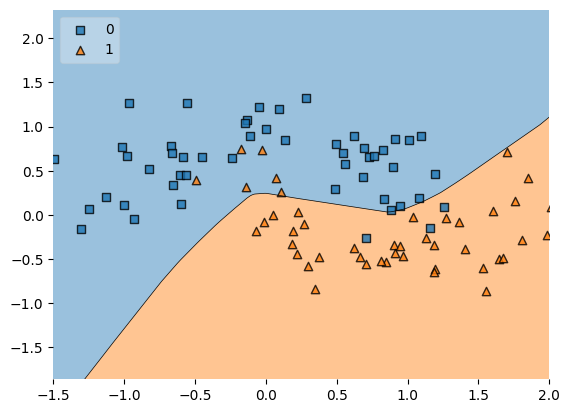

In [ ]:
plot_decision_regions(X,y.astype('int'),clf=Model,legend=2)
plt.xlim(-2,3)
plt.xlim(-1.5,2)
plt.show()

** I think using all these methods like Dropout, EarlyStopping and Regularization did make our model more accurate and saved time and computation and our model is more or less perfect fit

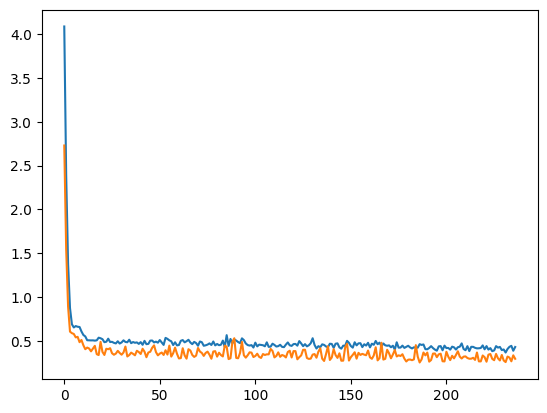

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

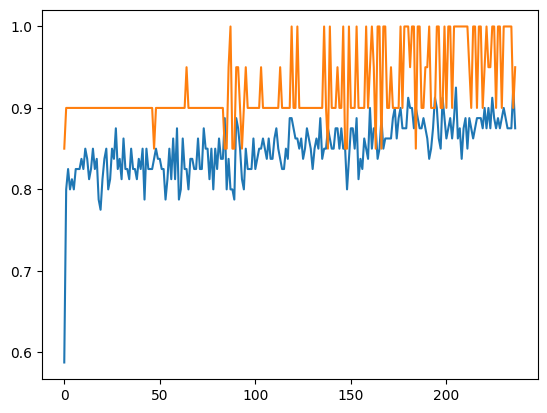

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])